In [52]:
import pandas as pd
import joblib
import numpy as np
from house_prices import preprocess
from house_prices import train
from house_prices import inference
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error
from sklearn.compose import ColumnTransformer,make_column_transformer
import seaborn as sns
from sklearn.pipeline import Pipeline,FeatureUnion

1. Model Building

Model Training

In [7]:
df = pd.read_csv('d:\DSP/train.csv')

In [8]:
X = df.drop('SalePrice', axis=1)
Y = df['SalePrice']

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X, Y, test_size=0.25, random_state=42)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
77,78,50,RM,50.0,8635,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2008,WD,Normal,127000
1434,1435,20,RL,80.0,17400,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,160000
1111,1112,60,RL,80.0,10480,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,205000
647,648,20,RL,85.0,10452,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,155000
880,881,20,RL,60.0,7024,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,157000


In [11]:
target = 'SalePrice'

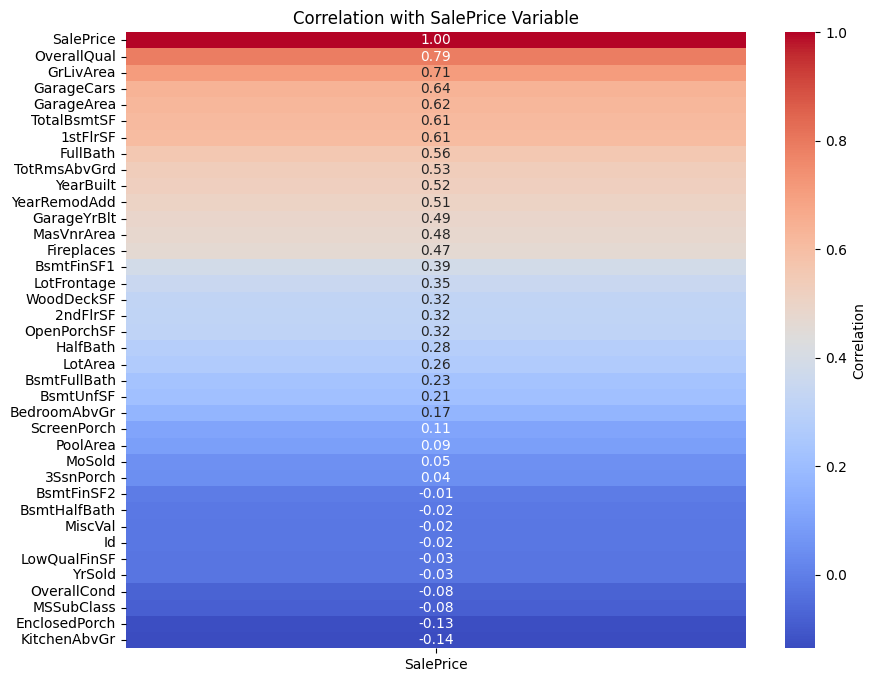

In [38]:
numeric_df = df.select_dtypes(include=['number'])

# Compute correlations with the target variable
correlation_with_target = numeric_df.corr()[target].sort_values(ascending=False)

# Plot the heatmap
correlation_df = pd.DataFrame(correlation_with_target)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation'})
plt.title(f'Correlation with {target} Variable')
plt.show()

In [14]:
selected_columns = pd.DataFrame(df[['LotArea', 'GrLivArea', 'OverallQual', 'GarageCars', 'BldgType', 'Neighborhood','SalePrice']])



In [15]:
X = selected_columns.drop('SalePrice', axis=1)
y = selected_columns['SalePrice']

In [16]:
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
continuous_columns = X.select_dtypes(exclude=['object']).columns.tolist()
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

In [18]:
continuous_preprocessor = StandardScaler()
categorical_preprocessor = OneHotEncoder(handle_unknown='ignore')

In [19]:
continuous_preprocessor.fit(X_train_selected[continuous_columns])

StandardScaler()

In [20]:
X_train_continuous = continuous_preprocessor.transform(X_train_selected[continuous_columns])
X_test_continuous = continuous_preprocessor.transform(X_test_selected[continuous_columns])

In [21]:
categorical_preprocessor.fit(X_train_selected[categorical_columns])

OneHotEncoder(handle_unknown='ignore')

In [22]:
X_train_categorical = categorical_preprocessor.transform(X_train_selected[categorical_columns])
X_test_categorical = categorical_preprocessor.transform(X_test_selected[categorical_columns])


In [23]:

X_train_clean = pd.DataFrame(X_train_continuous, columns=continuous_columns).join(
    pd.DataFrame(X_train_categorical.toarray(), columns=categorical_preprocessor.get_feature_names_out(categorical_columns))
)
X_test_clean = pd.DataFrame(X_test_continuous, columns=continuous_columns).join(
    pd.DataFrame(X_test_categorical.toarray(), columns=categorical_preprocessor.get_feature_names_out(categorical_columns))
)

In [24]:
linear_regression = LinearRegression()
linear_regression.fit(X_train_clean,y_train_selected)
print('Coefficients:', linear_regression.coef_)

Coefficients: [  6179.13602562  23281.26030776  25523.54839613  10381.39908433
  22375.17087489  11661.09258957   2823.43101686 -27344.69007753
  -9515.00440379  10591.99184828 -18774.2945162   -6498.92124857
 -21826.4250179    6111.93346914  -1659.84133357   4800.03277102
 -23186.72703294 -15991.65211868 -33611.89164076  13027.47913551
 -10998.29010295 -17835.46282881   4656.31948031 -19519.32356041
  44164.19176157  60310.86443421 -41700.77292992 -37048.2044693
 -16074.2129762  -10673.695816    16357.67795511  69021.58058571
   2812.10731186  43545.53683953]


Model Evaluation

In [25]:
def train_model(X_train, y_train):
    # Your model training logic here
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Save the trained model
    joblib.dump(model, 'models/model.joblib')
    
    return model

In [26]:
selected_columns = ['LotArea', 'GrLivArea', 'OverallQual', 'GarageCars', 'BldgType', 'Neighborhood', 'SalePrice']
df_selected = df[selected_columns]

In [27]:
X = df_selected.drop('SalePrice', axis=1)
y = df_selected['SalePrice']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
continuous_columns = X.select_dtypes(exclude=['object']).columns.tolist()
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

In [30]:
continuous_preprocessor = StandardScaler()
categorical_preprocessor = OneHotEncoder(handle_unknown='ignore')

In [31]:
X_train_continuous = continuous_preprocessor.fit_transform(X_train[continuous_columns])

In [32]:
X_train_categorical = categorical_preprocessor.fit_transform(X_train[categorical_columns])

In [33]:
X_train_clean = pd.DataFrame(X_train_continuous, columns=continuous_columns).join(
    pd.DataFrame(X_train_categorical.toarray(), columns=categorical_preprocessor.get_feature_names_out(categorical_columns))
)

In [34]:
linear_regression = LinearRegression()
linear_regression.fit(X_train_clean,y_train)

LinearRegression()

In [35]:
X_test_continuous = continuous_preprocessor.transform(X_test[continuous_columns])
X_test_categorical = categorical_preprocessor.transform(X_test[categorical_columns])
X_test_clean = pd.DataFrame(X_test_continuous, columns=continuous_columns).join(
    pd.DataFrame(X_test_categorical.toarray(), columns=categorical_preprocessor.get_feature_names_out(categorical_columns))
)

In [39]:
y_pred = linear_regression.predict(X_test_clean)

In [40]:
def compute_rmse(y_test: np.ndarray, y_pred: np.ndarray, precision: int = 2) -> float:
    rmse = np.sqrt(mean_squared_log_error(y_test_selected, y_pred))
    return round(rmse, precision)
 
rmse = compute_rmse(y_test_selected, y_pred)
print("RMSE:", rmse)

RMSE: 0.18


2. Model Inference

In [51]:
def make_predictions(data: pd.DataFrame) -> pd.Series:
    # Assuming model and preprocess functions are defined elsewhere
    preprocessed_data = preprocess(data)
    predictions = model.predict(preprocessed_data)
    return predictions

In [44]:
df = pd.read_csv('d:\DSP/train.csv')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [46]:
X_test_data_continuous = continuous_preprocessor.transform(df[continuous_columns])
X_test_data_categorical = categorical_preprocessor.transform(df[categorical_columns])
X_test_data_clean = pd.DataFrame(X_test_data_continuous, columns=continuous_columns).join(
    pd.DataFrame(X_test_data_categorical.toarray(), columns=categorical_preprocessor.get_feature_names_out(categorical_columns))
)

In [48]:
from sklearn.impute import SimpleImputer

# Now you can use SimpleImputer and other classes from sklearn
continuous_imputer = SimpleImputer(strategy='mean')
continuous_preprocessor = Pipeline(steps=[
    ('imputer', continuous_imputer),
    ('scaler', StandardScaler())
])

categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_preprocessor = Pipeline(steps=[
    ('imputer', categorical_imputer),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', continuous_preprocessor, continuous_columns),
        ('cat', categorical_preprocessor, categorical_columns)
    ]
)


In [49]:
X_test_data_clean = X_test_data_clean.dropna()

In [50]:
y_test_data_pred = linear_regression.predict(X_test_data_clean)